# Semantically Segmenting Text Using Word Embeddings and Greedy Sequence Segmentation

This notebook illustrates how to use the text_segmentation_class in text_segmetnation.py to semantically segment a text document.The class converts a document's words into GloVe embeddings and uses the embedding information to semantically segment the document into k segmetns, where k is given.

* glove -> word2vec: https://github.com/jroakes/glove-to-word2vec/blob/master/convert.py

In [11]:
import os
import json
import re

path = "./book-json/"

def preprocessing(input_path):
    with open(path + input_path, encoding='utf-8') as json_file:
        json_data = json.load(json_file)
    
    # 본문
    title = json_data["title"]
    texts = json_data["texts"]

    # 문장별로 잘려서 들어가있는 본문
    splitted_text = list()

 

    split = False
    split_sentence = ""
    for i in range(len(texts)):
        page = int(texts[i]["page"])
        text = texts[i]["text"]
        if text[-2] not in ["?", ".", "!", "\n"]: # 문장이 끊겨 있으면
            split_n = True
            end = -1
        else :
            split_n = False
            end = 0
            
        text = re.sub("[^ ㄱ-ㅣ가-힣0-9a-zA-Z\.|\?|\!|\n]+", "", text)
        sents = re.split(r"[\?|\.|\!|\n]", text)
        
        if split :
            splitted_text.append(split_sentence + sents[0])
            start = 1
            split = False
        else : start = 0
        
        if split_n :
            split_sentence = sents[-1]
            
        split = split_n
        
      
        for i in range(start, len(sents) + end):
            if sents[i] == "f ":
                pass
            elif sents[i] == None:
                pass
            elif sents[i] == "\n":
                pass
            elif sents[i] == "":
                pass
            elif sents[i] == " ":
                pass
            else:
                splitted_text.append(sents[i])

    for i in range(len(splitted_text)):
        if splitted_text[i][0] == " ":
            splitted_text[i] = splitted_text[i][1:]

    whole_text = ""
    
    for i in splitted_text:
        whole_text = whole_text + " " + i

    return title, whole_text


In [20]:
title, text = preprocessing("김동리_역마.json")
f = open("./kor+last+leaf.txt", "w")
f.write(text)

17211

In [21]:
%matplotlib inline

import spacy
import nltk
import os
from gensim.models import KeyedVectors
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import math
from scipy import spatial
import matplotlib.pyplot as plt
import mpld3

import text_segmentation as ts

# For interactive plots within the python notebook
mpld3.enable_notebook()

In [22]:
# the directory containing the Stanford GloVe model
# Change this to the proper path in your environment
#glove_file = './glove.6B/glove.6B.100d.txt'
glove_file = "kor-glove.txt"

# the document to be segmented
file_name="kor+last+leaf.txt"

In [23]:
# Instantiating the text segmetnation class object
seg_obj = ts.text_segmentation_class(file_name, glove_file)

In [41]:
# Find best segmentation boundaries to create n segments, for a given k
k=3

# Segment text into k segments using the greedy method
seg_obj.greedy_text_segmentation(k);

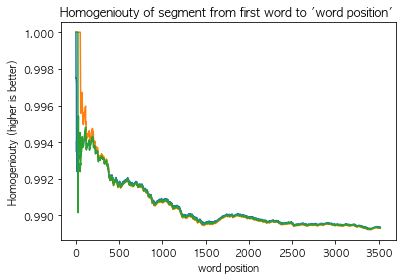

In [42]:
# type
# for each segment S from a word i to another word j in the document, 
# we measure D the average distance of each word in the segment from the segment's centroid
# The smaller that distance, the more homogeneneous the segment
# therefor, homogeniouty can be defined as 1-D
#
# Here we plot the homegeniouty of segments from the first word to each subsequent word in the text.

plt.plot(1-seg_obj.avg_dist[0,:])
plt.ylabel('Homogeniouty (higher is better)')
plt.xlabel('word position')
plt.title('Homogeniouty of segment from first word to \'word position\' ')
plt.plot(1-seg_obj.avg_dist[50,:])
plt.plot(1-seg_obj.avg_dist[23,:])
plt.show()

In [43]:
segments= seg_obj.get_segment_texts()

In [44]:
for i, seg in enumerate(segments):
    print("segment {}:\n{}\n====".format(i+1, seg))

segment 1:
 화개장터의 냇물은 길과 함께 흘러서 세 갈래로 나 있었다 한 줄 기는 전라도 구례쪽에서 오고 한 줄기는 경상도쪽 화개협 에서 흘러 내려 여기서 합쳐서 푸른 산과 검은 고목 그림자를 거 꾸로 비치인 채 호수같이 조용히 돌아 경상 전라 양도의 경계를 그 어주며 다시 남으로 남으로 흘러내리는 것이 섬진강 본류 였다 하동 구례 쌍계사의 세 갈래 길목이라 오고가는 나그 네로 하여 화개장터엔 장날이 아니라도 언제나 흥성거리는 날이 많았다 지리산 들어가는 길이 고래로 허다하지만 쌍계사 세 이암의 화개협 시오 리를 끼고 앉은 화개장터의 이름이 높 았다 경상 전라 양 도 접경이 한두 군데일리 없지만 또한 이 화개 장터를 두고 일렀다 장날이면 지리산 화전민들의 더덕 도라 지 두릅 고사리들이 화갯골에서 내려오고 전라도 황아 장수들의 실 바늘 면경 가위 허리끈 주머니끈 족집게 골백분 들이 또한 구렛길 에서 넘어오고 하동길에서는 섬진강 하류의 해물 장수들이 김 미역 청각 명태 자반 조기 자반 고등어들이 올라오곤 하여 산협치 고는 꽤 성한 장이 서는 것이기도 했으나 그러나 화개장터의 이름 은 장으로 하여서만 있는 것이 아니었다 장이 서지 않는 날일지라도 인근 고을 사람들에게 그곳이 그렇 게 언제나 그리운 것은 장터 위에서 화갯골로 뻗쳐 앉은 주막마다 유 달리 맑고 시원한 막걸리와 펄펄 살아뛰는 물고기의 회를 먹을 수 있 기 때문인지도 몰랐다 주막 앞에 늘어선 능수버들 가지 사이사이로 사철 흘러나오는 그 한 많고 멋들어진 춘향가 판소리 육자배기들 이 있기 때문인지도 몰랐다 게다가 가끔 전라도 지방에서 꾸며 나오 는 남사당 여사당 협률 창극 광대들이 마지막 연습 겸 첫 공연 으로 여기서 으례 재주와 신명을 떨고서야 경상도로 넘어간다는 한갓 관습과 전례가 화개장터의 이름을 더욱 높이고 그립게하는 것인지도 몰랐다 가운데도 옥화네 주막은 술맛이 유달리 좋고 값이 싸고 안주인 즉 옥화의 인심이 후하다 하여 화개장터에서는 가장 이름이 들난 주막이었다 얼마 전에 그 어머니가 죽

In [10]:
seg_obj.voc_freqs

{'줄기': 2,
 '화필': 2,
 '자루': 1,
 '비난': 1,
 '두': 5,
 '베개': 3,
 '공동': 1,
 '담쟁이': 12,
 '눈썹': 1,
 '남비': 1,
 '주인공': 1,
 '오락가락': 1,
 '팔레트': 1,
 '아무리': 2,
 '한': 1,
 '효력': 1,
 '어쩔': 2,
 '정신': 1,
 '처방': 1,
 '식욕': 1,
 '행렬': 1,
 '약속': 2,
 '한두': 1,
 '랜턴': 1,
 '백': 1,
 '하나': 13,
 '밑': 3,
 '곳': 1,
 '승마': 1,
 '열매': 1,
 '수': 27,
 '몸집': 1,
 '수가': 2,
 '그날': 3,
 '생명': 1,
 '빨리': 2,
 '바보': 3,
 '지붕': 1,
 '주름': 1,
 '오랫동안': 1,
 '풍기': 1,
 '정말': 6,
 '겁': 1,
 '그건': 3,
 '겨울': 1,
 '이윽고': 1,
 '죠': 1,
 '물감': 2,
 '머리': 2,
 '눈물': 1,
 '그림': 10,
 '다음': 1,
 '희생': 1,
 '너': 2,
 '습격': 1,
 '베다': 12,
 '이상': 2,
 '왕성': 1,
 '것': 20,
 '셔츠': 1,
 '걸': 5,
 '벌거숭이': 1,
 '다발': 1,
 '손': 5,
 '면': 1,
 '광장': 1,
 '그런데': 3,
 '감고': 2,
 '꼼짝': 2,
 '부인': 1,
 '난': 5,
 '삽화': 2,
 '마주': 1,
 '늘': 2,
 '위': 6,
 '어': 1,
 '상업': 1,
 '사람': 9,
 '그때': 1,
 '덩굴': 5,
 '언제': 1,
 '때': 4,
 '마필': 1,
 '알다': 4,
 '별로': 1,
 '지탱': 1,
 '나': 4,
 '게': 5,
 '저기': 2,
 '보다': 6,
 '단념': 1,
 '시작': 3,
 '광부': 3,
 '빗방울': 1,
 '8': 1,
 '전': 6,
 '채': 6,
 '팔로': 1,
 '수은': 1,
 '저쪽': 1,
 '근소